<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

Посмотрим на выборку из 5 строк из датасета.

In [4]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2519,72,92.00,6632.75,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
3996,2,20.05,42.7,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4444,1,70.30,70.3,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
4220,70,80.70,5617.95,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Electronic check,0
535,64,89.45,5692.65,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Проверим, какой тип данных используется в каждой колонке и нет ли отсутствующих значений.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Кажется, все значения на месте. На всякий случай перепроверим с помощью метода `DataFrame.isna()`

In [7]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропуски в данных отсутствуют. 

Судя по всему, колонка TotalSpent должна содержать числовые данные. Приведём её к числовому виду.

Поскольку простое приведение к типу `float` не сработало, посмотрим, что мешает.

In [8]:
sorted(data['TotalSpent'].unique())[:10]

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.9',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5']

In [9]:
indexes_to_del = data[data['TotalSpent'] == ' '].index

data = data.drop(labels=indexes_to_del, axis='index')

In [10]:
data['TotalSpent'] = data['TotalSpent'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Анализ численных признаков

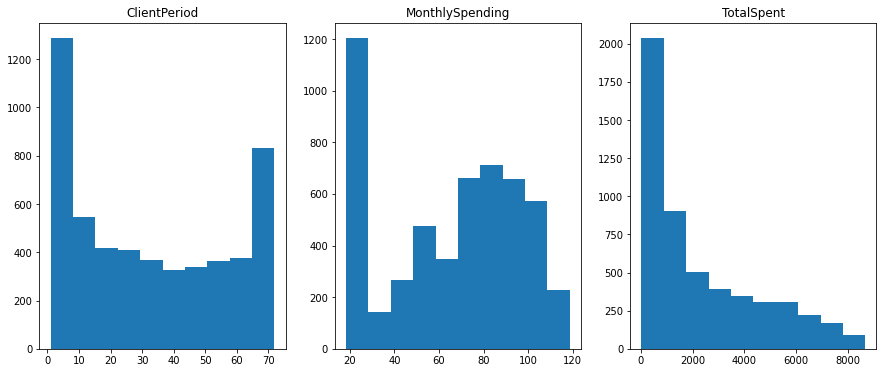

In [ ]:
fig, axs = plt.subplots(1, len(num_cols), squeeze=False, figsize=(15, 6))


for index, feature in enumerate(num_cols):
    axs[0, index].hist(data[feature])
    axs[0, index].set_title(feature)

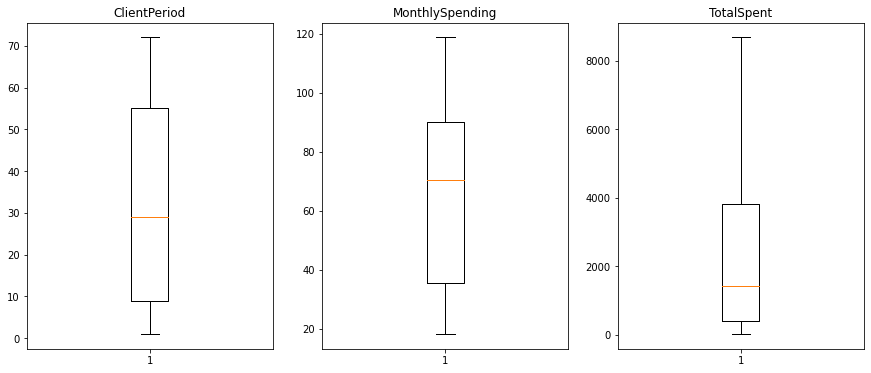

In [ ]:
fig, axs = plt.subplots(1, len(num_cols), squeeze=False, figsize=(15, 6))

for index, feature in enumerate(num_cols):
    axs[0, index].boxplot(data[feature])
    axs[0, index].set_title(feature)


## Анализ категориальных признаков

In [ ]:
len(cat_cols)

16

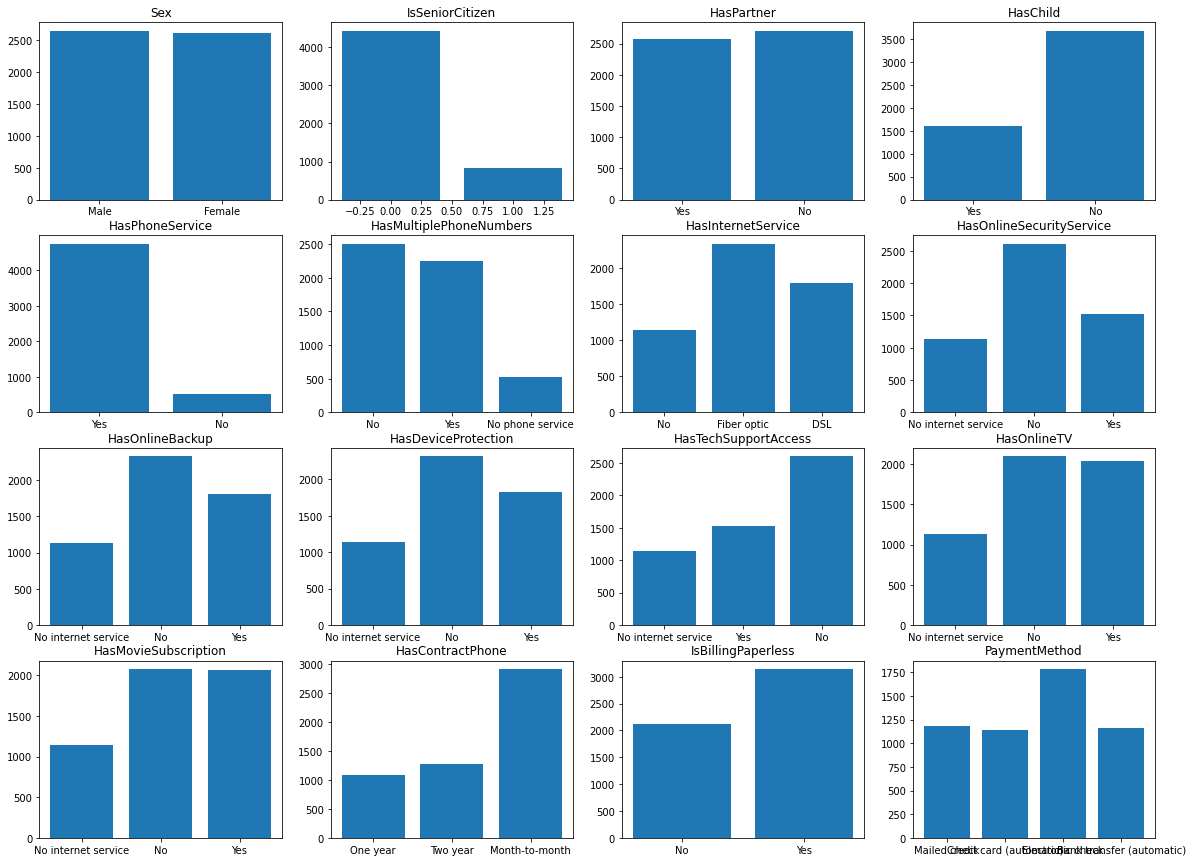

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15))

for index, feature in enumerate(cat_cols):
    axs[index // 4, index % 4].bar(data[feature].unique(), [(data[feature] == x).sum() for x in data[feature].unique()])
    axs[index // 4, index % 4].set_title(feature)

## Распределение целевой переменной

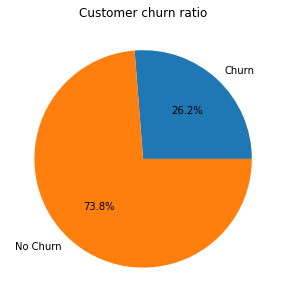

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([data['Churn'].sum(), data['Churn'].count() - data['Churn'].sum()], labels=['Churn', 'No Churn'], autopct='%1.1f%%')
plt.title('Customer churn ratio')
# plt.legend()
plt.show()

По графику видно, что классы можно считать сбалансированными.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve

Закодируем категориальные признаки с помощью `pd.get_dummies()`

In [12]:
X = pd.concat([data[num_cols], pd.get_dummies(data[cat_cols], drop_first=True)], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.90,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570.00,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


Разделим данные на обучающую и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], 
                                                    train_size=0.8,
                                                    random_state=42)

Отнормируем числовые признаки.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegressionCV(cv=5, random_state=42, refit=True, scoring='roc_auc').fit(X_train_scaled, y_train)

In [ ]:
y_train_predictions = logreg.predict_proba(X_train_scaled)[:, 1]
y_test_predictions = logreg.predict_proba(X_test_scaled)[:, 1]

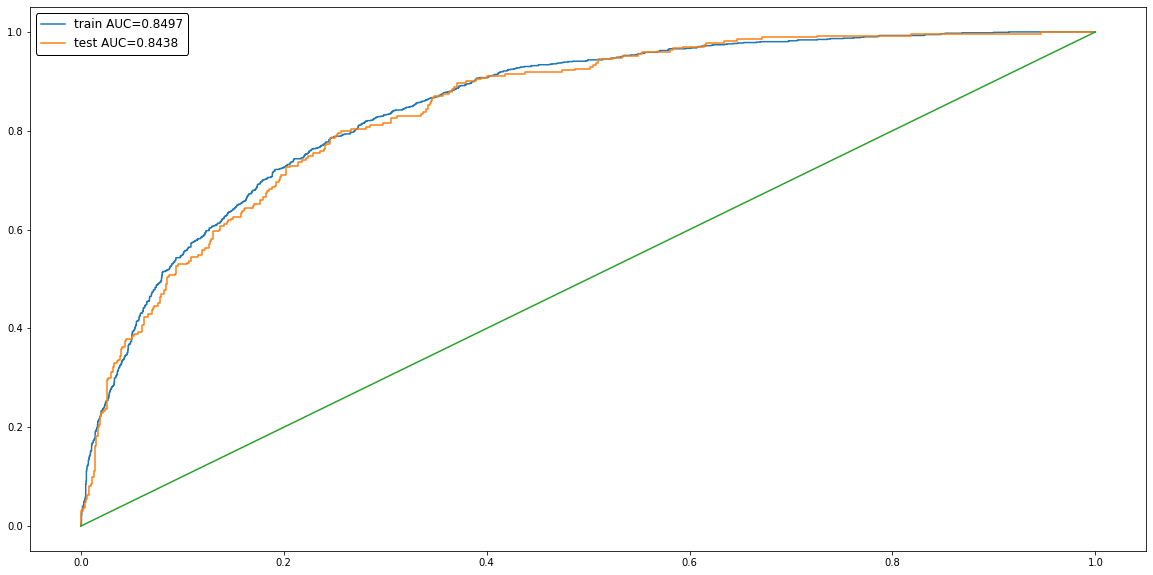

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predictions)
test_auc = roc_auc_score(y_test, y_test_predictions)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predictions)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predictions)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
logreg.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Лучшее качество: `roc_auc_score = 0.8438` с параметром `Cs=10`

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 26 kB/s 


In [ ]:
import catboost

In [ ]:
X_train_origin, X_test_origin, _, _ = train_test_split(data[feature_cols], axis=1),
                                                       data[target_col], 
                                                       train_size=0.8, 
                                                       random_state=42)

In [ ]:
catboost_model = catboost.CatBoostClassifier(cat_features=cat_cols)

catboost_model.fit(X_train_origin, y_train)
catboost_train_predictions = catboost_model.predict_proba(X_train_origin)[:, 1]
catboost_test_predictions = catboost_model.predict_proba(X_test_origin)[:, 1]

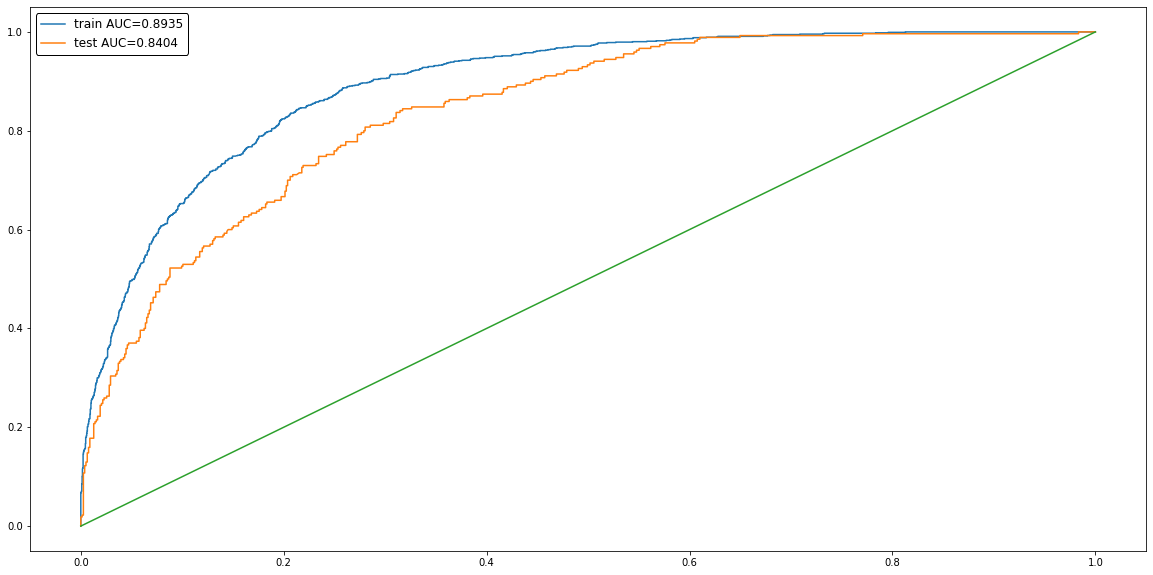

In [ ]:
train_auc = roc_auc_score(y_train, catboost_train_predictions)
test_auc = roc_auc_score(y_test, catboost_test_predictions)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, catboost_train_predictions)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, catboost_test_predictions)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Попробуем подобрать параметры `learning_rate` и `n_estimators`

In [ ]:
learning_rate = np.linspace(0.01, 0.1, 10)
estimators = np.linspace(100, 1000, 10)
results = np.zeros((10, 10))
for i_index, lr in enumerate(learning_rate):
    for j_index, est in enumerate(estimators):
        model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                                     n_estimators=est,
                                                     learning_rate=lr)
        model.fit(X_train_origin, y_train)
        results[i_index][j_index] = roc_auc_score(y_test, model.predict_proba(X_test_origin)[:, 1])


In [ ]:
df = pd.DataFrame(results, columns=learning_rate, index=estimators)
df.style.background_gradient(cmap='Blues')

,0.01,0.020000000000000004,0.030000000000000006,0.04000000000000001,0.05000000000000001,0.06000000000000001,0.07,0.08,0.09000000000000001,0.1
100.0,0.827313,0.836129,0.837738,0.839255,0.840075,0.840677,0.841106,0.841451,0.841500,0.841441
200.0,0.832864,0.839696,0.840415,0.841142,0.841224,0.841314,0.840186,0.840436,0.839903,0.839738
300.0,0.840611,0.841062,0.842173,0.842133,0.841859,0.840840,0.840363,0.840017,0.839403,0.839127
400.0,0.841684,0.841427,0.842241,0.840495,0.839295,0.838816,0.837660,0.835975,0.834551,0.833831
500.0,0.840958,0.841439,0.843024,0.840788,0.840637,0.839396,0.836841,0.835640,0.833881,0.831602
600.0,0.839061,0.842210,0.840403,0.839835,0.837613,0.834916,0.831972,0.830745,0.829056,0.827094
700.0,0.842404,0.841833,0.837259,0.834810,0.831106,0.830611,0.829625,0.827681,0.826275,0.825039
800.0,0.843175,0.838912,0.836980,0.833414,0.831047,0.828424,0.825957,0.824532,0.824107,0.822616
900.0,0.840484,0.837172,0.833640,0.830892,0.829245,0.826778,0.824032,0.821597,0.821824,0.818195
1000.0,0.843732,0.838603,0.837164,0.833442,0.830217,0.827967,0.825244,0.824711,0.823060,0.821437


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: `roc_auc_score = 0.8437` с параметрами `learning_rate = 0.01` и `n_estimators = 1000`

# Предсказания

In [ ]:
best_model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                         n_estimators=1000,
                                         learning_rate=0.01)

best_model.fit(data[feature_cols], data[target_col])

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test) # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.



---


Kaggle name: Marina Lakeeva, результат 0.85178